# Convolution-Neural-Network

 A convolution neural network is a class of deep neural network most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics.

 Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex.

Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.

## Stride
Stride is a component of convolutional neural networks (CNNs) that performs a convolution operation on the input data. Stride can be seen as a parameter of the convolution kernel that modifies the amount of movement over the image or video when the kernel is applied to it.

## Padding
 Padding is a term in computer science, used to refer to the process of preparing data for transmission over a network. This involves adding extra data to the output of an algorithm to improve the speed of network transmission.

 Droping the data from the edges of the image is called padding.
 
## Non Linearity
### ReLu - Rectified Linear Unit
ReLU is the most commonly used activation function in neural networks, especially in CNNs. ReLU is linear (identity) for all positive values, and zero for all negative values. The function and its derivative both are monotonic. ReLU is half-rectified (from bottom). f(x) is zero when x is less than zero and f(x) is equal to x when x is above or equal to zero.

### Pooling
 Pooling is a sample-based discretization process. The main purpose of pooling is to reduce the size of the input. This is done by summarizing the features present in a region of the feature map generated by a convolution layer. Pooling can be of different types, namely, max, average, sum, etc.

    Max Pooling:
     - Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be an array of size 2x2x1.
     Average Pooling:
           - Average pooling is a pooling operation that selects the average value from the region of the feature map covered by the filter. Thus, the output after average-pooling layer would be an array of size 2x2x1.
     Sum Pooling:
      - Sum pooling is a pooling operation that selects the sum value from the region of the feature map covered by the filter. Thus, the output after sum-pooling layer would be an array of size 2x2x1.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os



In [3]:
# read train and test data
train = pd.read_csv('MNISTtrain.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('MNISTtest.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# put labels into y_train variable
y_train = train["label"]
# Drop 'label' column
x_train = train.drop(labels = ["label"],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

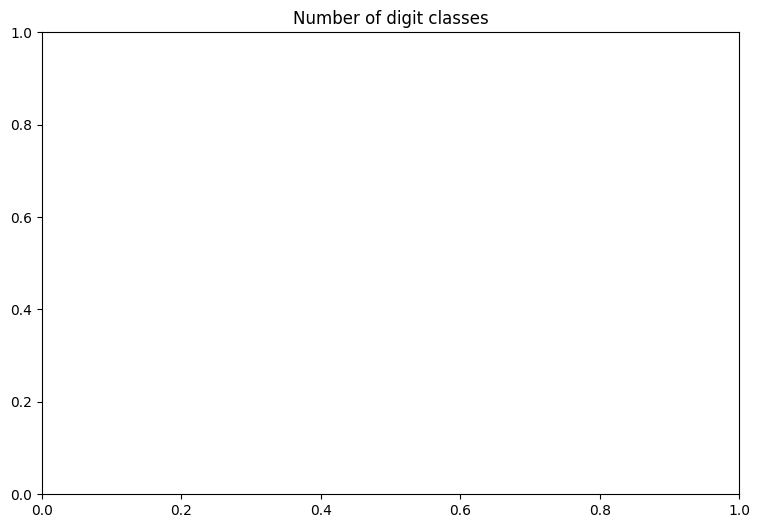

In [14]:
# visualize number of digits classes
plt.figure(figsize=(9,6))
# g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

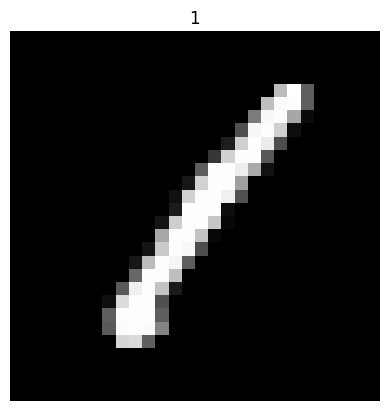

In [8]:
import matplotlib.pyplot as plt

# Assuming x_train is a DataFrame and the first column contains image data
img = x_train.iloc[0].values
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0])
plt.axis("off")
plt.show()


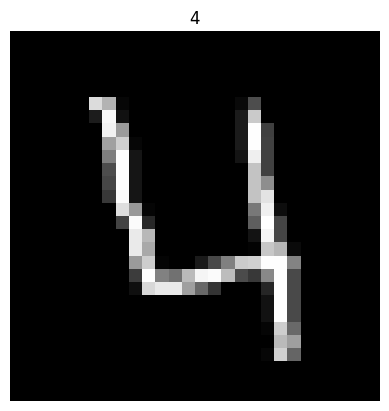

In [9]:
# plot some samples
img = x_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()